** Stroke Prediction Dataset - Dataset para a previsão de AVC **
Esse conjunto de dados, baseado em informações da Organização Mundial da Saúde (OMS), tem como objetivo prever a probabilidade de um paciente sofrer um acidente vascular cerebral (AVC). 

# Configurações

Bibliotecas

In [1]:
!pip install nbformat


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: C:\Users\ferna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.image as mpimg

def open_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

import warnings   
warnings.filterwarnings('ignore')

In [123]:
sns.set_theme(style="whitegrid") 

In [188]:
map = {
    "id": "ID",
    "gender": "Gênero",
    "age": "Idade",
    "hypertension": "Hipertensão",
    "heart_disease": "Doença Cardíaca",
    "ever_married": "Já Casado(a)",
    "work_type": "Tipo de Trabalho",
    "Residence_type": "Tipo de Residência",
    "avg_glucose_level": "Nível Médio de Glicose",
    "bmi": "IMC",
    "smoking_status": "Status de Fumo",
    "stroke": "AVC",

    # para gênero:
    "female": "Feminino",
    "male": "Masculino",
    "Other  ": "Outro",

    # para tipo de trabalho:
    "Private": "Privado",
    "Self-employed": "Autônomo",
    "Govt_job": "Governo",
    "children": "Crianças",
    "Never_worked": "Nunca Trabalhou",

    # para tipo de residência:
    "Urban": "Urbana",
    "Rural": "Rural",
    
    # para status de fumo:
    "formerly smoked": "Ex-fumante",
    "never smoked": "Nunca Fumou",
    "smokes": "Fumante",
    "Unknown": "Desconhecido"
}

# Descrição e exploração simples dos dados 

In [189]:
#Carregamento do dataset
df = pd.read_csv('..\\data\\raw\\data-stroke\\healthcare-dataset-stroke-data.csv', encoding='utf-8') 

print(f"\nNúmero de instâncias: {df.shape[0]}")
print(f"Número de atributos: {df.shape[1]}")


Número de instâncias: 5110
Número de atributos: 12


In [190]:
# [ Número de casos sem AVC, Número de casos com AVC]
stroke_values = df['stroke'].value_counts().sort_index().tolist() 

# 5110 instâncias toal
total_cases = stroke_values[0] + stroke_values[1]

# Rótulos para os gráficos sobre AVC
labels_avc = ['Não teve AVC', 'Teve AVC']

# DataFrame apenas com casos de AVC
stroke_df = df[df['stroke'] == 1]

In [127]:
# Visualização de linhas do DataFrame
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Link do artigo Stroke Risk Factores, Genetics, and Prevention: https://www.ahajournals.org/doi/10.1161/CIRCRESAHA.116.308398
Publicado em: 3 de Fevereiro de 2017.
Citado por 1296 trabalhos.

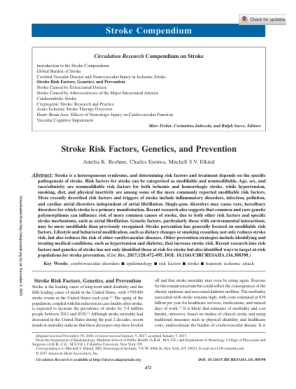

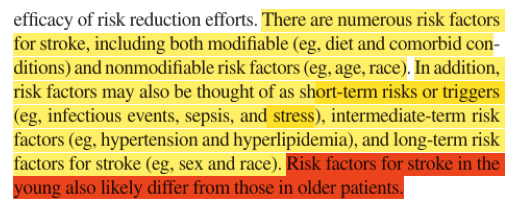

In [128]:
open_image('..\\reports\\figures\\apresentacao_19-11\\1.png')
open_image('..\\reports\\figures\\apresentacao_19-11\\2.png')

In [129]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [131]:
for col in df.columns:
    if col in ["id","age","avg_glucose_level","bmi"]:
        continue

    print("\n==============================")
    print(col)
    print("------------------------------")

    vc = df[col].value_counts(dropna=False)

    for label, count in vc.items():
        print(f"{label}: {count}")

    print(f"Total: {df[col].shape[0]}")



gender
------------------------------
Female: 2994
Male: 2115
Other: 1
Total: 5110

hypertension
------------------------------
0: 4612
1: 498
Total: 5110

heart_disease
------------------------------
0: 4834
1: 276
Total: 5110

ever_married
------------------------------
Yes: 3353
No: 1757
Total: 5110

work_type
------------------------------
Private: 2925
Self-employed: 819
children: 687
Govt_job: 657
Never_worked: 22
Total: 5110

Residence_type
------------------------------
Urban: 2596
Rural: 2514
Total: 5110

smoking_status
------------------------------
never smoked: 1892
Unknown: 1544
formerly smoked: 885
smokes: 789
Total: 5110

stroke
------------------------------
0: 4861
1: 249
Total: 5110


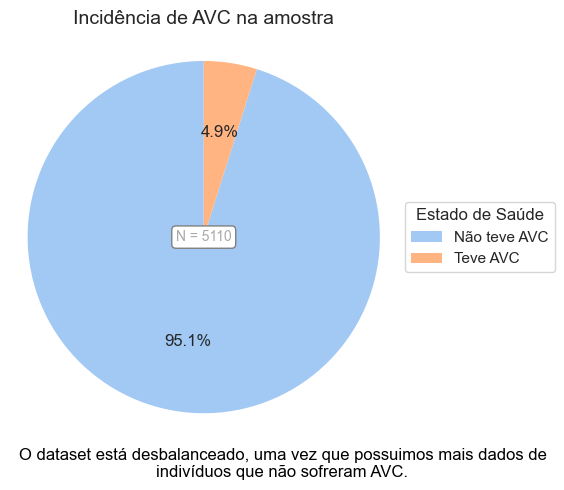

In [132]:
colors = sns.color_palette('pastel', n_colors=2) 

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    stroke_values,
    colors=sns.color_palette('pastel', n_colors=2),
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'none'}
)

ax.set_title('Incidência de AVC na amostra', fontsize=14, loc='center', pad=15)
ax.axis('equal') 

ax.legend(
    labels_avc, 
    title="Estado de Saúde", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1) 
)

ax.text(
    0, 0, 
    f'N = {len(df)}', 
    ha='center', 
    va='center', 
    fontsize=10,
    color='darkgray',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray')
)

plt.figtext(
    0.67, 
    0.02,
    'O dataset está desbalanceado, uma vez que possuimos mais dados de indivíduos que não sofreram AVC.',
    ha='center', 
    fontsize=12,
    color='black',
    wrap=True
)

plt.show()

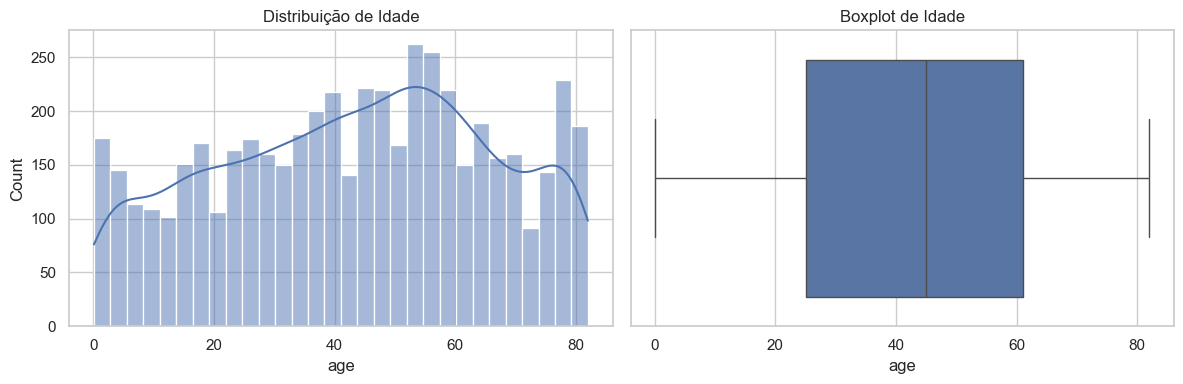

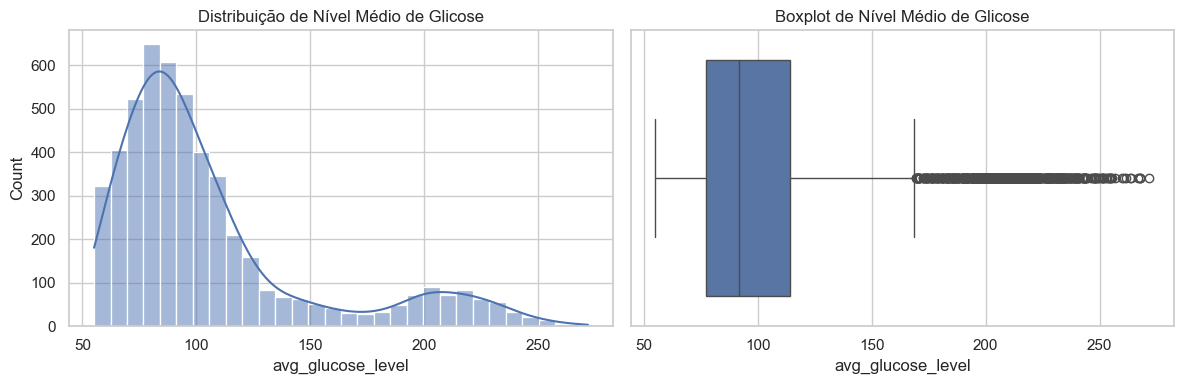

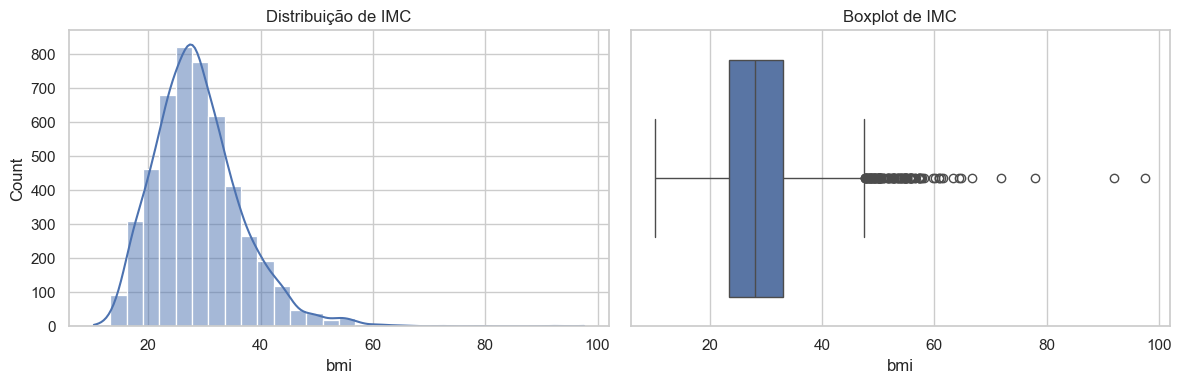

In [133]:
for col in ["age","avg_glucose_level","bmi"]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Distribuição de {map[col]}')

    sns.boxplot(x=col, data=df, ax=ax[1])
    ax[1].set_title(f'Boxplot de {map[col]}')

    plt.tight_layout()
    plt.show()


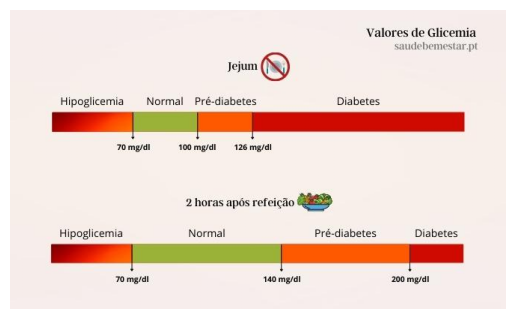

In [134]:
open_image('..\\reports\\figures\\apresentacao_19-11\\3.png')

In [135]:
# Tabela de atributos conforme o T1
attributes_table = [
    {"Variable Name": "id", "Role": "Identifier", "Type": "Integer", "Demographic": "-", 
     "Description": "Unique identifier for each patient", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "gender", "Role": "Feature", "Type": "Categorical", "Demographic": "Sex", 
     "Description": "Gender of the patient (Male, Female or Other)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "age", "Role": "Feature", "Type": "Numeric", "Demographic": "Age", 
     "Description": "Age of the patient", "Units": "years", "Missing Values": "no"},
    
    {"Variable Name": "hypertension", "Role": "Feature", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient has hypertension, 0 otherwise", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "heart_disease", "Role": "Feature", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient has any heart disease, 0 otherwise", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "ever_married", "Role": "Feature", "Type": "Categorical", "Demographic": "Personal", 
     "Description": "Marital status of the patient (Yes or No)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "work_type", "Role": "Feature", "Type": "Categorical", "Demographic": "Occupation", 
     "Description": "Type of work (children, Govt_job, Never_worked, Private, Self-employed)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "Residence_type", "Role": "Feature", "Type": "Categorical", "Demographic": "Residence", 
     "Description": "Type of residence (Rural or Urban)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "avg_glucose_level", "Role": "Feature", "Type": "Numeric", "Demographic": "Health", 
     "Description": "Average glucose level in blood", "Units": "mg/dL", "Missing Values": "no"},
    
    {"Variable Name": "bmi", "Role": "Feature", "Type": "Numeric", "Demographic": "Health", 
     "Description": "Body Mass Index of the patient", "Units": "kg/m²", "Missing Values": "yes"},
    
    {"Variable Name": "smoking_status", "Role": "Feature", "Type": "Categorical", "Demographic": "Behavior", 
     "Description": "Smoking status (formerly smoked, never smoked, smokes, or Unknown)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "stroke", "Role": "Target", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient had a stroke, 0 otherwise", "Units": "-", "Missing Values": "no"},
]


df_attributes = pd.DataFrame(attributes_table)
df_attributes


,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,id,Identifier,Integer,-,Unique identifier for each patient,-,no
1,gender,Feature,Categorical,Sex,"Gender of the patient (Male, Female or Other)",-,no
2,age,Feature,Numeric,Age,Age of the patient,years,no
3,hypertension,Feature,Binary,Health,"1 if the patient has hypertension, 0 otherwise",-,no
4,heart_disease,Feature,Binary,Health,"1 if the patient has any heart disease, 0 othe...",-,no
5,ever_married,Feature,Categorical,Personal,Marital status of the patient (Yes or No),-,no
6,work_type,Feature,Categorical,Occupation,"Type of work (children, Govt_job, Never_worked...",-,no
7,Residence_type,Feature,Categorical,Residence,Type of residence (Rural or Urban),-,no
8,avg_glucose_level,Feature,Numeric,Health,Average glucose level in blood,mg/dL,no
9,bmi,Feature,Numeric,Health,Body Mass Index of the patient,kg/m²,yes


# Tratamento dos dados

1. Verificando se há valores faltantes

In [136]:
print('Valores faltantes por atributo:', df.isnull().sum())

Valores faltantes por atributo: id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [137]:
df_bmi_null = df[df["bmi"].isna()]

null_counts = df_bmi_null["stroke"].value_counts()

stroke_yes = null_counts.get(1, 0)
stroke_no = null_counts.get(0, 0)

print("===== Registros com BMI ausente =====")
print(f"Total: {len(df_bmi_null)}")
print(f"• Com AVC: {stroke_yes}")
print(f"• Sem AVC: {stroke_no}")

total_bmi_null = len(df_bmi_null)
pct_stroke_in_null = (stroke_yes / total_bmi_null) * 100
pct_stroke_with_null_bmi = (stroke_yes / stroke_values[1]) * 100

print("\n===== Porcentagens =====")
print(f"• Porcentagem de pessoas com AVC que têm BMI nulo: {pct_stroke_with_null_bmi:.2f}%")
print(f"• Porcentagem de AVC ENTRE BMI NULO: {pct_stroke_in_null:.2f}%")

px_data = {
    "Status": labels_avc,
    "Quantidade": [stroke_no, stroke_yes]
}

fig = px.bar(
    px_data,
    x="Status",
    y="Quantidade",
    text="Quantidade",
    color="Status",
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Quantidade de casos com AVC entre registros com BMI ausente"
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title="Quantidade", xaxis_title="Status")

fig.show()

===== Registros com BMI ausente =====
Total: 201
• Com AVC: 40
• Sem AVC: 161

===== Porcentagens =====
• Porcentagem de pessoas com AVC que têm BMI nulo: 16.06%
• Porcentagem de AVC ENTRE BMI NULO: 19.90%


2. BMI tem valores anormais: Valores acima de 60 são anormais para bmi, portanto arredondamos todos os valores acima desse valor para 60.

BMI = peso (kg) / (altura (m) x altura (m)).

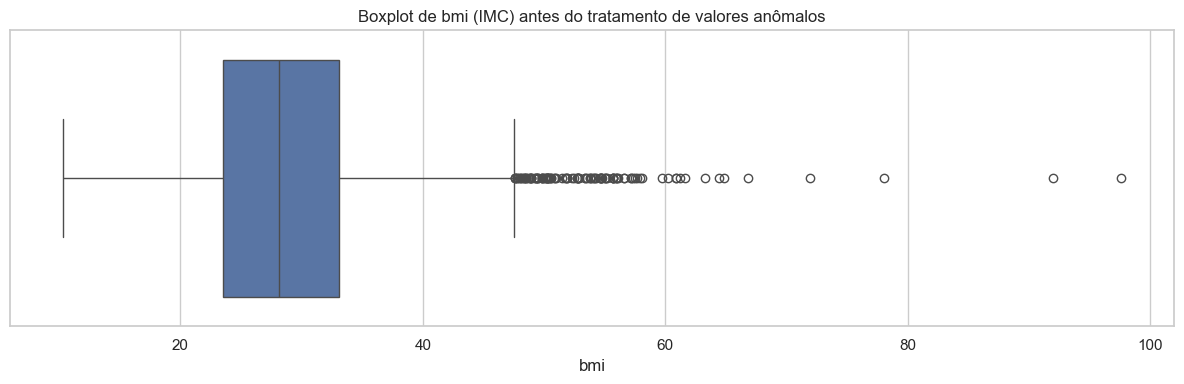

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

sns.boxplot(x='bmi', data=df, ax=ax)
ax.set_title(f"Boxplot de bmi (IMC) antes do tratamento de valores anômalos")

plt.tight_layout()
plt.show()


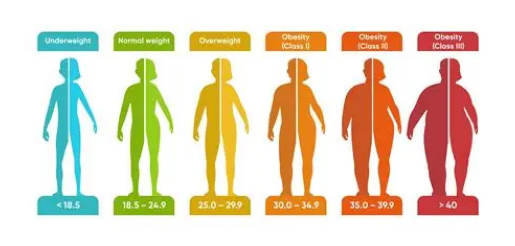

In [139]:
open_image('..\\reports\\figures\\apresentacao_19-11\\4.png')

In [140]:
print("Número de indivíduos com o bmi maior que 60:", len(df.loc[df['bmi'] > 60]))

# Substitui valores de BMI maiores que 60 por 60
df.loc[df['bmi'] > 60, 'bmi'] = 60

print("Número de indivíduos com o bmi maior que 60 após o tratamento:", df.loc[df["bmi"]>60].shape[0])

Número de indivíduos com o bmi maior que 60: 13
Número de indivíduos com o bmi maior que 60 após o tratamento: 0


3. Preenchemos a os valores faltantes de bmi com a mediana dos valores da coluna. A opção de dropar essas instâncias foram descartadas pois correspondiam a uma boa parte dos indivíduos que sofreram AVC.

In [141]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

print('Valores faltantes por atributo:', df.isnull().sum())

Valores faltantes por atributo: id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


4. Verificando o formato dos dados. Percebemos que a idade está em float64, podemos transformá-la para int64.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [143]:
df.loc[:, 'age'] = df['age'].astype('int64')

# Perguntas

### 1. A idade é um fator de risco para o AVC?
- O gráfico de linha mostra que o risco cresce de forma lenta até os 50 anos, acelera após os 60 e dispara a partir dos 75 — evidenciando que a idade é um determinante crucial para a ocorrência de AVC. Além disso, a média de idade das pessoas que sofreram AVC é de cerca de 67 anos, muito próximo do sugerido no artigo (69.2 anos).

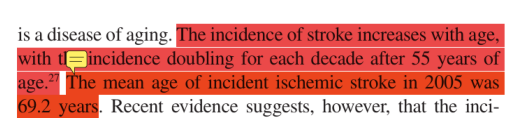

In [28]:
open_image('..\\reports\\figures\\apresentacao_19-11\\5.png')

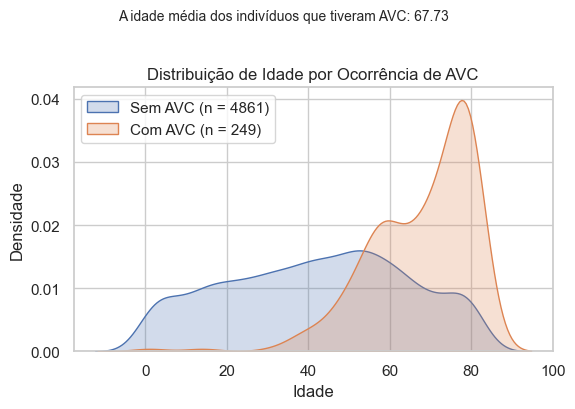

In [147]:
plt.figure(figsize=(6,4))

sns.kdeplot(
    df.loc[df['stroke']==0, 'age'],
    label=f"Sem AVC (n = {stroke_values[0]})",
    fill=True
)

age_stroke = df.loc[df['stroke']==1, 'age']

sns.kdeplot(
    age_stroke,
    label=f"Com AVC (n = {stroke_values[1]})",
    fill=True
)

plt.title("Distribuição de Idade por Ocorrência de AVC")
plt.suptitle(
    f"A idade média dos indivíduos que tiveram AVC: {age_stroke.mean():.2f}",
    fontsize=10,
    y=1.02
)

plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
ages = range(df['age'].min(), df['age'].max() + 1)
stroke_rate = []

for age in ages:
    subset = df[df['age'] <= age]  # pessoas com idade até 'age'
    stroke_rate.append(subset['stroke'].mean() * 100)  # porcentagem

# DataFrame para plotar
df_plot = pd.DataFrame({'Idade': ages, 'Taxa_AVC': stroke_rate})

# Gráfico de linha
fig = px.line(
    df_plot,
    x='Idade',
    y='Taxa_AVC',
    title='Risco de AVC por Idade',
    labels={'Idade': 'Idade', 'Taxa_AVC': 'Taxa de AVC (%)'},
    markers=True
)

fig.show()

### 2. Qual grupo tem mais risco de ter AVC de acordo com o sexo?

- A proporção de mulheres que sofreram AVC é maior do que os homens. Além disso, antes dos 40 anos, observa-se uma incidência maior de AVC entre mulheres. É importante destacar que o dataset possui mais mulheres do que homens, o que pode influenciar essa diferença absoluta nos valores. 

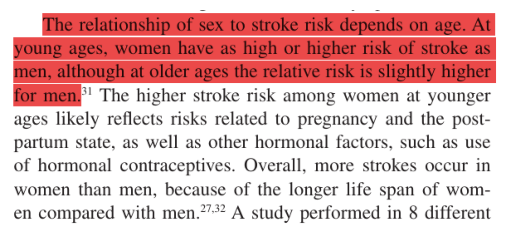

In [31]:
open_image('..\\reports\\figures\\apresentacao_19-11\\6.png')

In [166]:
risk_age_gender = (
    df.groupby(["age", "gender"])["stroke"]
    .mean()
    .reset_index()
    .rename(columns={"stroke": "stroke_rate"})
)


risk_age_gender["stroke_rate_smooth"] = (
    risk_age_gender
    .groupby("gender")["stroke_rate"]
    .transform(lambda x: x.rolling(window=5, center=True, min_periods=1).mean())
)


fig = px.line(
    risk_age_gender,
    x="age",
    y="stroke_rate_smooth",
    color="gender",
    title="Taxa de AVC por Idade e Sexo",
    labels={
        "age": "Idade",
        "stroke_rate_smooth": "Taxa de AVC (suavizada)",
        "gender": "Sexo"
    }
)

fig.update_layout(
    yaxis_tickformat=".2%",
    title_x=0.5
)

fig.show()

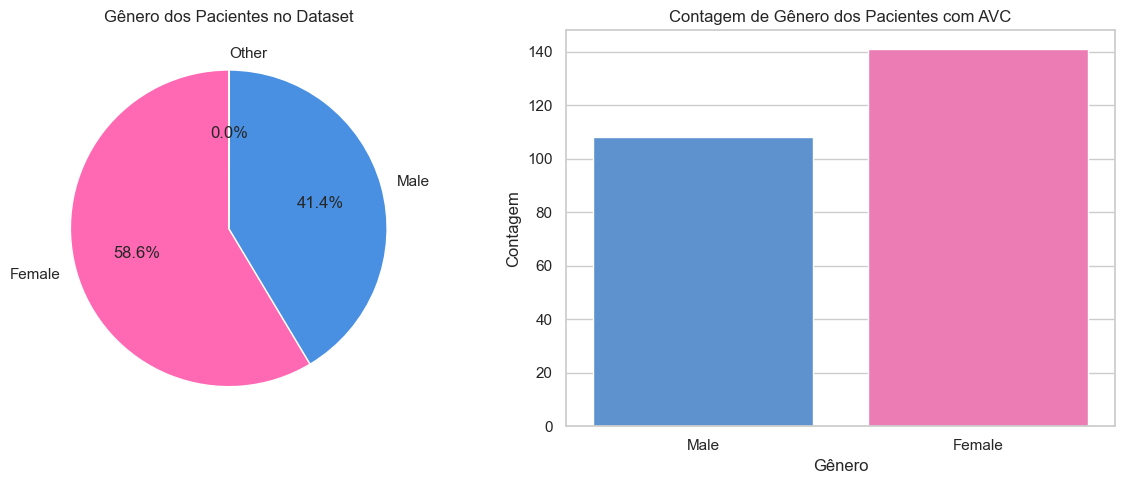

In [167]:
blue = "#4A90E2"
pink = "#FF69B4"
other = "#FFD700"

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

gender_count = df["gender"].value_counts()
stroke_gender_counts = stroke_df["gender"].value_counts()

ax[0].pie(
    gender_count,
    labels=gender_count.index,
    autopct="%.1f%%",
    startangle=90,
    colors=[pink,blue,other]  
)
ax[0].set_title("Gênero dos Pacientes no Dataset")


sns.countplot(
    data=stroke_df,
    x="gender",
    palette={"Male": blue, "Female": pink, "Other": other},
    ax=ax[1]
)

ax[1].set_title("Contagem de Gênero dos Pacientes com AVC")
ax[1].set_xlabel("Gênero")
ax[1].set_ylabel("Contagem")

plt.tight_layout()
plt.show()

### 3. Doenças cardíacas são fatores de risco pro AVC?
- Pelo gráfico de barras, observa-se que aproximadamente 20% das pessoas que sofreram AVC apresentam doença cardíaca. Embora esse percentual não seja extremamente elevado, ele é suficiente para indicar uma possível relação entre doença cardíaca e AVC. Além disso, o artigo destaca que o aumento da idade está associado a um maior número de casos de doença cardíaca, o que reforça essa relação. Essa tendência também pode ser visualizada nos gráficos de histograma e boxplot, que mostram a distribuição da idade e a ocorrência de AVC entre indivíduos com e sem doença cardíaca.

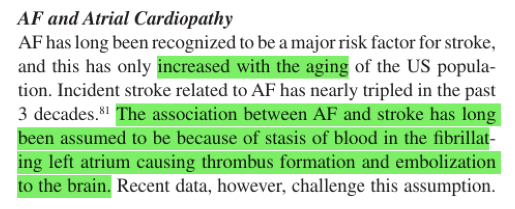

In [168]:
open_image('..\\reports\\figures\\apresentacao_19-11\\7.png')


In [176]:
heart_disease_df = df[df["heart_disease"] == 1].copy()

In [177]:
counts_hd_in_stroke = stroke_df["heart_disease"].value_counts().rename({
    0: "Sem Doença Cardíaca",
    1: "Com Doença Cardíaca"
})

print(f"Porcentagens de Doença Cardíaca entre pessoas que tiveram AVC: {len(stroke_df[stroke_df['heart_disease']==1]) / len(stroke_df) * 100:.2f}%")

df_hd = heart_disease_df.copy()
df_hd["AVC"] = df_hd["stroke"].map({0: "Sem AVC", 1: "Com AVC"})

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Doença Cardíaca entre Pessoas com AVC",
        "Idade de Pessoas com Doença Cardíaca (Com vs. Sem AVC)"
    )
)


fig.add_trace(
    go.Bar(
        x=counts_hd_in_stroke.index,
        y=counts_hd_in_stroke.values,
        text=counts_hd_in_stroke.values,
        textposition="outside",
        marker_color=["#636EFA", "#EF553B"]
    ),
    row=1, col=1
)


fig.add_trace(
    go.Box(
        x=df_hd["AVC"],
        y=df_hd["age"],
        boxmean=True,
        marker_color="#636EFA"
    ),
    row=1, col=2
)

# Layout geral
fig.update_layout(
    height=600,
    width=1000,
    showlegend=False,
    title_text="Análise de AVC e Doença Cardíaca",
    title_x=0.5
)

fig.show()


Porcentagens de Doença Cardíaca entre pessoas que tiveram AVC: 18.88%


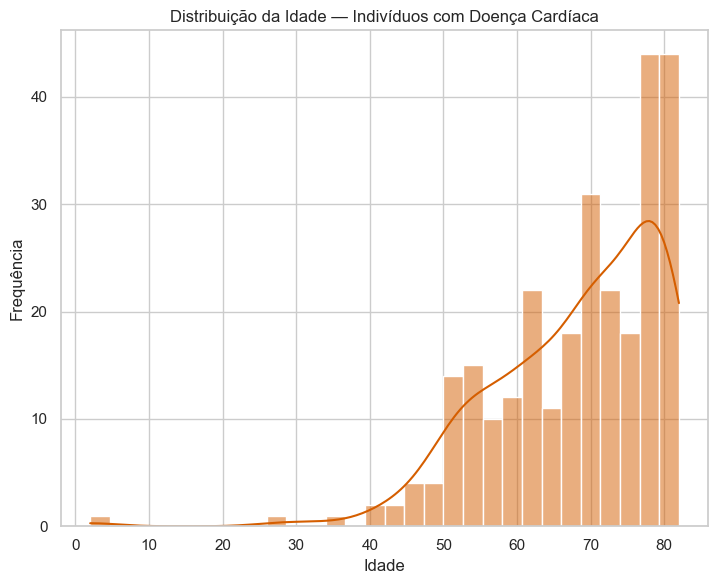

In [178]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(
    heart_disease_df["age"],
    bins=30,
    kde=True,
    color="#D55E00"
)
plt.title("Distribuição da Idade — Indivíduos com Doença Cardíaca")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


### 4. Ter hipertensão e/ou diabete impacta no risco de AVC? Se sim, entre essas comorbidades, qual é mais impactante para o risco de AVC? 
- De acordo com o artigo, a hipertensão é o fator de risco modificável mais importante para o AVC, superando até mesmo a diabetes. O gráfico de pizza mostra que quase 30% das pessoas que sofreram AVC apresentavam hipertensão, um valor bastante significativo.

- Em relação à diabetes, como o nível de glicose é uma variável contínua, utilizamos um boxplot para analisar a distribuição dos pacientes que sofreram AVC. Observa-se que os pacientes com AVC tendem a apresentar níveis de glicose mais altos, indicando uma relação entre diabetes e o risco de AVC.

- Para determinar qual fator é mais impactante, analisamos um heatmap considerando todos os pacientes com nível de glicose acima de 200 como diabéticos. Verificamos que o número de pessoas com hipertensão que sofreram AVC é maior do que o número de pessoas com diabetes, independentemente da presença de outras comorbidades.

- Além disso, conforme descrito no artigo, pacientes que apresentam ambas as condições (hipertensão e diabetes) têm um risco potencializado. No nosso conjunto de dados, 17 pacientes com ambas as comorbidades sofreram AVC, um número não tão significativo, em relação as duas comorbidades isoladas.

- O artigo também destaca que a associação entre hipertensão e AVC pode estar relacionada à idade, já que pessoas mais velhas tendem a apresentar hipertensão, o que é confirmado pelo gráfico de stripplot, que mostra um aumento da prevalência de hipertensão com a idade.

- Conclusão: A hipertensão é o fator mais relevante para o risco de AVC, enquanto a diabetes também contribui.

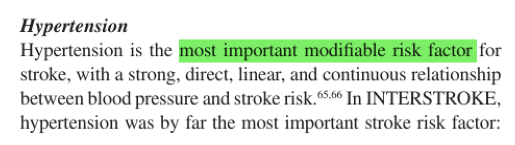

In [191]:
open_image('..\\reports\\figures\\apresentacao_19-11\\8.png')

In [192]:
df_avc_counts = stroke_df["hypertension"].map({0: "Sem Hipertensão", 1: "Com Hipertensão"}).value_counts().reset_index()
df_avc_counts.columns = ["Hipertensão", "Contagem"]

fig = px.pie(
    df_avc_counts,
    names="Hipertensão",
    values="Contagem",
    color="Hipertensão",
    color_discrete_map={"Com Hipertensão": "#EF553B", "Sem Hipertensão": "#636EFA"},
    title="Pacientes que sofreram AVC por presença de Hipertensão"
)

fig.show()


In [193]:
fig = px.violin(
    df,
    x="stroke",
    y="avg_glucose_level",
    color="stroke",
    box=True,
    labels={"stroke": "AVC", "avg_glucose_level": "Nível de Glicose"},
    title="Distribuição do nível de glicose entre indivíduos com e sem AVC"
)

fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=labels_avc
)

fig.show()


In [199]:
heatmap_data_diabetes = df.groupby(["stroke", "hypertension", "Diabetes"]).size().reset_index(name="Contagem")

df_avc0 = heatmap_data_diabetes[heatmap_data_diabetes["stroke"] == 0]
df_avc1 = heatmap_data_diabetes[heatmap_data_diabetes["stroke"] == 1]

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Não Teve AVC", "Teve AVC")
)

fig.add_trace(
    go.Heatmap(
        x=df_avc0["hypertension"],
        y=df_avc0["Diabetes"],
        z=df_avc0["Contagem"],
        colorscale="Plasma",
        text=df_avc0["Contagem"],
        texttemplate="%{text}",
        showscale=True,
        colorbar=dict(title="Nº Pacientes")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Heatmap(
        x=df_avc1["hypertension"],
        y=df_avc1["Diabetes"],
        z=df_avc1["Contagem"],
        colorscale="Plasma",
        text=df_avc1["Contagem"],
        texttemplate="%{text}",
        showscale=False
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Correlação entre Hipertensão e Diabetes — Separado por AVC",
    title_x=0.5,
    height=500
)

fig.show()


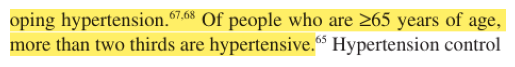

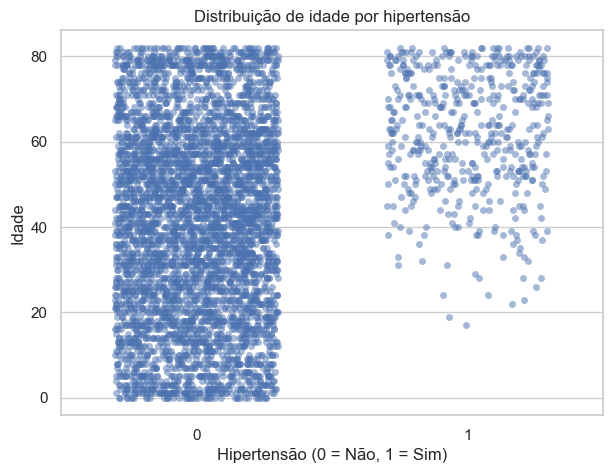

In [185]:
open_image('..\\reports\\figures\\apresentacao_19-11\\9.png')

plt.figure(figsize=(7,5))
sns.stripplot(x='hypertension', y='age', data=df, jitter=0.3, alpha=0.5)
plt.title('Distribuição de idade por hipertensão')
plt.xlabel('Hipertensão (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

### 5. Os indivíduos diabéticos que tiveram AVC são mais jovens ou mais velhos?
- O artigo menciona que os pacientes com diabetes que sofreram AVC tendem a ser mais jovens. No entanto, ao analisarmos os dados considerando níveis de glicose acima de 140 (que podem indicar diabetes ou pré-diabetes), quase não encontramos casos de pacientes mais jovens que sofreram AVC. Essa observação não corresponde à informação apresentada no artigo e é evidenciada no gráfico scatter, que mostra que a maioria dos casos de AVC entre diabéticos está concentrada em idades mais avançadas.

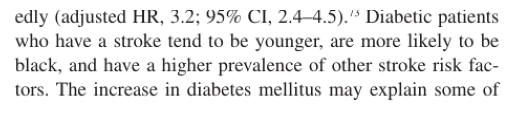

In [54]:
open_image('..\\reports\\figures\\apresentacao_19-11\\10.png')

In [202]:
fig = px.scatter(
    df.sort_values("avg_glucose_level"),   
    x="avg_glucose_level",
    y="age",                              
    color="stroke",
    symbol="stroke",
    symbol_map={0: 'circle', 1: 'x'},
    labels={
        "avg_glucose_level": "Nível de Glicose",
        "age": "Idade",
        "stroke": "AVC"
    },
    title="Relação entre Nível de Glicose e Ocorrência de AVC"
)

fig.update_traces(opacity=0.6)

fig.show()


### 6. Como os valores de BMI se relacionam com o risco de sofrer um AVC?
- R= O gráfico de boxplot abaixo demonstra que embora o BMI mais alto esteja presente em muitos pacientes que sofreram AVC, a sobreposição com pacientes sem AVC indica que o BMI sozinho não é um determinante exclusivo do risco, mas pode atuar como um fator de risco associado, especialmente quando combinado com outras comorbidades como hipertensão ou diabetes.

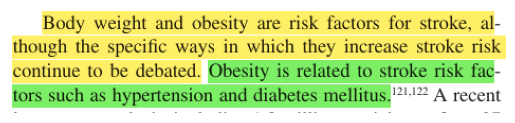

In [55]:
open_image('..\\reports\\figures\\apresentacao_19-11\\11.png')

In [206]:
df_plot = df.copy()
df_plot["stroke_label"] = df_plot["stroke"].map({0: "Sem AVC", 1: "Com AVC"})

In [207]:
df_plot["stroke_label"]

0       Com AVC
1       Com AVC
2       Com AVC
3       Com AVC
4       Com AVC
         ...   
5105    Sem AVC
5106    Sem AVC
5107    Sem AVC
5108    Sem AVC
5109    Sem AVC
Name: stroke_label, Length: 5110, dtype: object

In [211]:
df_plot = df.copy()
df_plot["stroke_label"] = df_plot["stroke"].map({0: "Sem AVC", 1: "Com AVC"})

fig = px.box(
    df_plot,
    x="stroke_label",
    y="bmi",
    color="stroke_label",
    title="Distribuição do BMI entre indivíduos com e sem AVC",
    labels={"stroke_label": "AVC", "bmi": "Índice de Massa Corporal"},
    points="all"  
)

fig.update_traces(opacity=0.6)

fig.show()


### 7. Qual a relação do Status de Casamento, Tipo de Residência e Tipo de Trabalho com o risco de sofrer um AVC?
- As visualizações nos gráficos de barra abaixo indicam que :
- Das pessoas que sofreram AVC, maioria são casadas.
- A localização da residência praticamente não influencia — moradores de áreas rurais e urbanas têm chances semelhantes de sofrer AVC. 
- Quanto à ocupação, pessoas do setor privado parecem ter maior probabilidade de AVC. Porém, mais de 55% dos indivíduos presentes no dataset são do setor privado, o que pode influenciar no resultado.
- O artigo não fala sofre o status de casamento mas referencia artigos que investigam esse fator. Além disso, menciona brevemente que a poluição do ar é um fator de risco (figura abaixo), que é mais acentuada na zona urbana, porém os dados não refletem esse risco. Por fim, não menciona sobre tipo de trabalho.

In [ ]:
open_image('..\\reports\\figures\\apresentacao_19-11\\12.png')

In [214]:
colors = {0: "#636EFA", 1: "#EF553B"}

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Casado vs AVC",
        "Tipo de residência vs AVC",
        "Tipo de trabalho vs AVC"
    ]
)

counts_married = df.groupby(["ever_married", "stroke"]).size().reset_index(name="Count")

for stroke_val in counts_married["stroke"].unique():
    df_plot = counts_married[counts_married["stroke"] == stroke_val]
    fig.add_trace(
        go.Bar(
            x=df_plot["ever_married"],
            y=df_plot["Count"],
            name=f"AVC={stroke_val}",
            marker_color=colors[stroke_val]
        ),
        row=1, col=1
    )


counts_residence = df.groupby(["Residence_type", "stroke"]).size().reset_index(name="Count")
for stroke_val in counts_residence["stroke"].unique():
    df_plot = counts_residence[counts_residence["stroke"] == stroke_val]
    fig.add_trace(
        go.Bar(
            x=df_plot["Residence_type"],
            y=df_plot["Count"],
            name=f"AVC={stroke_val}",
            marker_color=colors[stroke_val],
            showlegend=False  
        ),
        row=1, col=2
    )


counts_work = df.groupby(["work_type", "stroke"]).size().reset_index(name="Count")
for stroke_val in counts_work["stroke"].unique():
    df_plot = counts_work[counts_work["stroke"] == stroke_val]
    fig.add_trace(
        go.Bar(
            x=df_plot["work_type"],
            y=df_plot["Count"],
            name=f"AVC={stroke_val}",
            marker_color=colors[stroke_val],
            showlegend=False
        ),
        row=1, col=3
    )


fig.update_layout(
    height=500,
    width=1500,
    title_text="Distribuição de Variáveis Categóricas vs AVC",
    barmode="group"
)

fig.update_yaxes(type="log", title_text="Contagem", row=1, col=1)
fig.update_yaxes(type="log", title_text="Contagem", row=1, col=2)
fig.update_yaxes(type="log", title_text="Contagem", row=1, col=3)

fig.show()


### 8. O fato do indivíduo ser fumante influencia no risco de AVC?
- O gráfico de barras abaixo mostra que, entre as pessoas que sofreram AVC, quase 50% tinham histórico de tabagismo (somando ex-fumantes e fumantes). A maior parte da amostra é composta por não fumantes, o que explica a porcentagem maior desse grupo. No entanto, mesmo com poucos fumantes e ex-fumantes, a proporção de casos de AVC nesse grupo é significativa, reforçando que o tabagismo está associado a um maior risco de AVC.

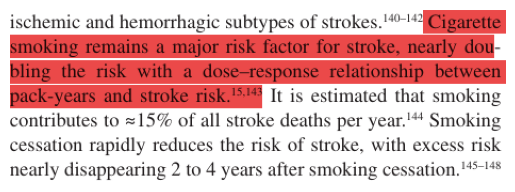

In [77]:
open_image('..\\reports\\figures\\apresentacao_19-11\\13.png')

In [215]:
avc_smoking_dist = stroke_df ['smoking_status'].value_counts(normalize=True).reset_index()
avc_smoking_dist.columns = ['smoking_status', 'percent']
avc_smoking_dist['percent'] = avc_smoking_dist['percent'] * 100

# Cria o gráfico de barras
fig = px.bar(
    avc_smoking_dist,
    x='smoking_status',
    y='percent',
    text='percent',
    title='Distribuição do Status de Tabagismo entre Pessoas com AVC',
    labels={'smoking_status': 'Status de Fumo', 'percent': 'Porcentagem (%)'},
    color='smoking_status'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(showlegend=False)

fig.show()


In [216]:
counts = df['smoking_status'].value_counts().reset_index()
counts.columns = ['Smoking_Status', 'Count']

fig = px.bar(
    counts,
    x='Smoking_Status',
    y='Count',
    text='Count',
    color='Smoking_Status',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Distribuição de Status de Fumo no Dataset"
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False, yaxis_title="Quantidade de Pessoas", xaxis_title="Status de Fumo")

fig.show()


### 9. Quais prevenções recomendaríamos para prevenir o risco de AVC com base na análise exploratória desses dados?

Nossa análise mostrou que idade e sexo não podem ser modificados, mas fatores como hipertensão, doenças cardíacas, glicose alta e tabagismo podem ser controlados. Portanto, a prevenção deve focar em hábitos de vida saudáveis:

Doenças cardíacas: manter dieta equilibrada, praticar exercícios, controlar estresse e fazer check-ups.

Hipertensão: monitorar pressão, reduzir sal e álcool, manter peso saudável e seguir tratamentos médicos.

Diabetes: controlar glicose com alimentação saudável, exercícios e acompanhamento médico.

Tabagismo: evitar ou parar de fumar, reduzir consumo de ultraprocessados e açúcar.

Em resumo, campanhas de prevenção devem reforçar hábitos saudáveis que atuem nesses fatores de risco modificáveis para reduzir significativamente o AVC.